In [48]:
from helper_loader import *

In [49]:
alignment_path = Path(
    "/home/ediun/git/histalign/projects/project_cortical_depth/9f5d5f117d/7b067a31b027506e3b39b5679a5151f9.json"
)

In [50]:
alignment_settings = load_alignment_settings(alignment_path)

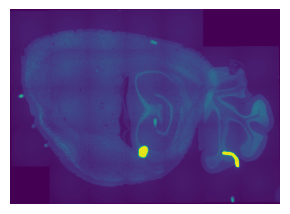

In [51]:
image = load_image(alignment_settings.histology_path)
imshow(image[::10, ::10], figsize=(3, 3))

In [52]:
cortex_mask = load_structure_mask(
    "Isocortex", alignment_settings.volume_settings.resolution, return_raw_array=True
)

structure_name = "Primary motor area, Layer 1"
cortical_structure_mask = load_structure_mask(
    structure_name,
    alignment_settings.volume_settings.resolution,
    return_raw_array=True,
)

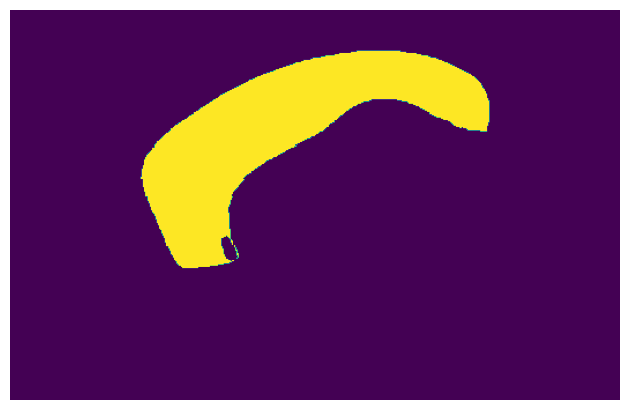

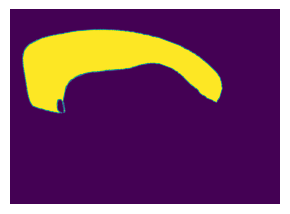

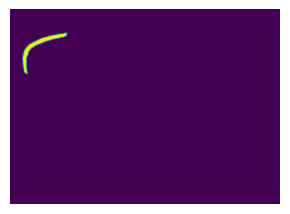

In [64]:
cortex_slice = VolumeSlicer(volume=vedo.Volume(cortex_mask)).slice(
    alignment_settings.volume_settings
)
imshow(cortex_slice)
cortex_slice_registered = Registrator(True, True).get_reversed_image(
    alignment_settings, "Isocortex", image
)
imshow(cortex_slice_registered[::10, ::10], figsize=(3, 3))

cortical_structure_slice = VolumeSlicer(
    volume=vedo.Volume(cortical_structure_mask)
).slice(alignment_settings.volume_settings)
cortical_structure_slice_registered = Registrator(True, True).get_reversed_image(
    alignment_settings, structure_name, image
)
imshow(cortical_structure_slice_registered[::10, ::10], figsize=(3, 3))

In [54]:
def compute_closest_contour_point(
    points: np.ndarray, points_pool: np.ndarray
) -> np.ndarray:
    return np.array(
        [points_pool[closest_contour_point(point, points_pool)] for point in points]
    )

In [55]:
cortex_contour = np.flipud(np.squeeze(compute_largest_contour(cortex_slice)))
cortical_structure_contour = np.flipud(
    np.squeeze((compute_largest_contour(cortical_structure_slice).reshape(-1, 2)))
)

In [56]:
closest_points = compute_closest_contour_point(
    cortical_structure_contour, cortex_contour
)

In [57]:
distances = compute_distances_nonisometric_grid(
    cortical_structure_contour,
    closest_points,
    alignment_settings.volume_settings.resolution,
    alignment_settings.volume_settings.resolution,
)

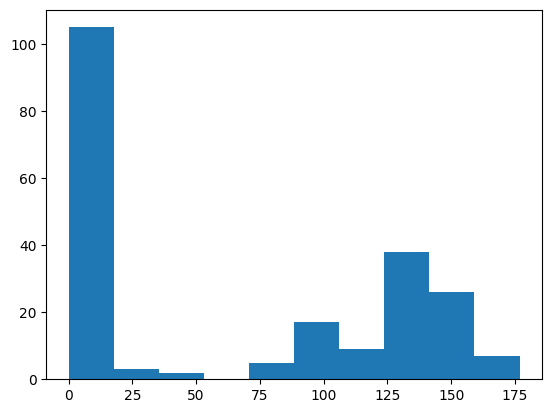

In [58]:
hist(distances)

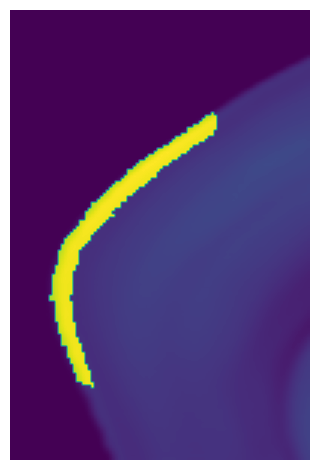

In [59]:
zoom_slice = (slice(50, 200), slice(100, 200))

atlas_slice = VolumeSlicer(
    volume=load_volume(get_atlas_path(alignment_settings.volume_settings.resolution))
).slice(alignment_settings.volume_settings)
imshow(np.where(cortical_structure_slice, atlas_slice + 1000, atlas_slice)[zoom_slice])

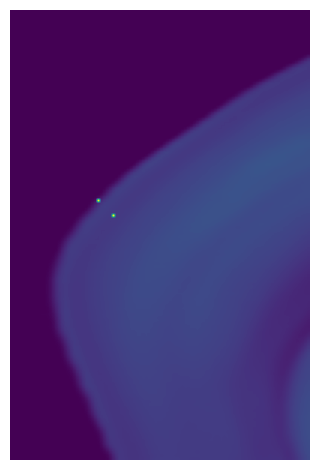

In [60]:
largest_distance_index = np.argmax(distances)
deepest_point = cortical_structure_contour[largest_distance_index]
closest_to_deepest = closest_points[largest_distance_index]

visualisation = atlas_slice.copy()
visualisation[deepest_point[1], deepest_point[0]] = 1000
visualisation[closest_to_deepest[1], closest_to_deepest[0]] = 1000
imshow(visualisation[zoom_slice])

In [63]:
np.max(distances)

176.7766952966369

In [62]:
deepest_point

array([134, 118], dtype=int32)

In [61]:
closest_to_deepest

array([129, 113], dtype=int32)